## Unsupervised Learning
### Cluster Analysis

## HELP International
### Problem Statement: 
Help international is an international humanitarian NGO which has raised around $10 million. It wants to use this money strategically and effectively by helping the countries which are in direst need of aid.
### Solution:
Categorising the countries based on their socio-economic and health factors which determine the overall development of the country and finding the countries which are in need of aid. 
### Approach
- Read and Understand the data.
- Exploratory Data Analysis.
- Preparing the data for modeling
- Building the model.
- Visualisation and Recommendation.

In [400]:
# Supressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [401]:
# Importing the required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [402]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [403]:
# To check Cluster Tendancy
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

In [404]:
# Setting the visual preferances.
# Note: Use jupyter 'Onedork' theme for better appearance.
plt.style.use('dark_background')
#%matplotlib inline

## Task 1: Read and Inspect data
- ### Subtask 1.1: Import and read

In [405]:
df = pd.read_csv('C:/demo/Assignment/ML/Clustering/HELP International/Country-data.csv')

In [406]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


- ### Subtask 1.2: Data Inspection

In [407]:
df.shape

(167, 10)

In [408]:
df.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [409]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


## Task 2: EDA
- ### Subtask 2.1: Missing values

In [410]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

- ### 2.2: Outliers treatment

In [411]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


##### Explanation: 
Few of the variables like: (exports, health, imports) are calculated as per capita percentage of the GDP per capita. These variables needs to be recalculated as expendutres per capita. This step is mandatory as it might affect grouping of clusters.

In [412]:
df['exports'] = df['gdpp']*df['exports']/100
df['health'] = df['gdpp']*df['health']/100
df['imports'] = df['gdpp']*df['imports']/100

In [413]:
df['exports'] = df['exports'].round(2)
df['health'] = df['health'].round(2)
df['imports'] = df['imports'].round(2)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200


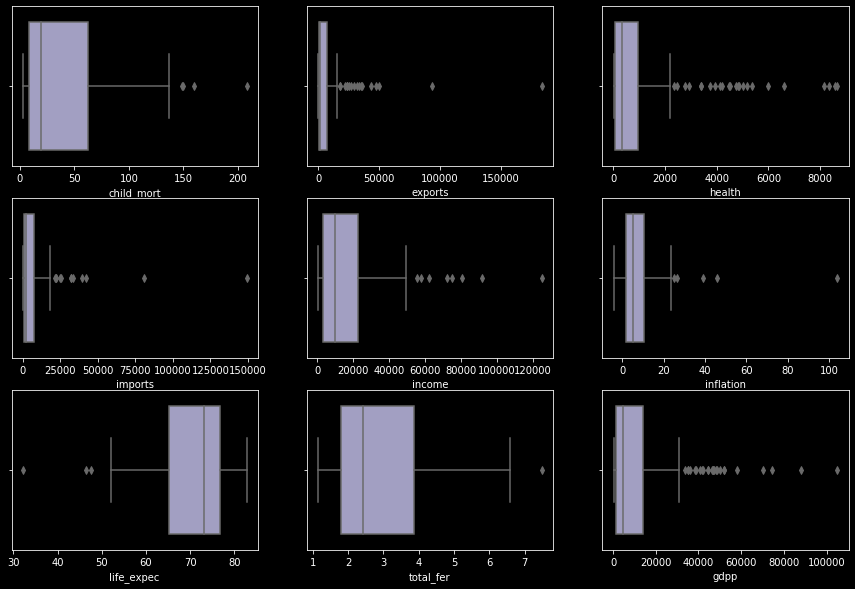

In [414]:
var = df.drop('country', axis = 1)
var = list(var.columns)
plt.figure(figsize = (15,10))
for x in enumerate(var):
    plt.subplot(3,3,x[0]+1)
    sns.boxplot(x = x[1], data = df, palette = 'Purples')
plt.show()

In [415]:
df['child_mort'].quantile([0.25,0.50,0.75,0.95,0.97,0.99])

0.25      8.25
0.50     19.30
0.75     62.10
0.95    116.00
0.97    130.14
0.99    153.40
Name: child_mort, dtype: float64

In [416]:
df.loc[df['child_mort'] > df['child_mort'].quantile(0.97), ['child_mort']] = df['child_mort'].quantile(0.97)

In [417]:
df['inflation'].describe(percentiles = [0.25, 0.50, 0.75, 0.95, 0.97,0.99])

count    167.000000
mean       7.781832
std       10.570704
min       -4.210000
25%        1.810000
50%        5.390000
75%       10.750000
95%       20.870000
97%       23.626000
99%       41.478000
max      104.000000
Name: inflation, dtype: float64

In [418]:
df.loc[df['inflation'] > df['inflation'].quantile(0.97), ['inflation']] = df['inflation'].quantile(0.97)

In [419]:
df['life_expec'].quantile([0.01,0.02,0.1,0.25,0.5])

0.01    47.160
0.02    52.352
0.10    57.820
0.25    65.300
0.50    73.100
Name: life_expec, dtype: float64

In [420]:
df.loc[df['life_expec'] <= df['life_expec'].quantile(0.02), ['life_expec']] = df['life_expec'].quantile(0.02)

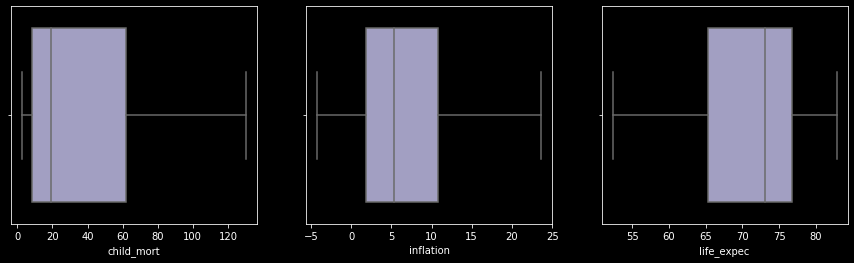

In [421]:
treated = ['child_mort', 'inflation', 'life_expec']
plt.figure(figsize = (15,4))
for x in enumerate(treated):
    plt.subplot(1,3,x[0]+1)
    sns.boxplot(x = x[1], data = df, palette = 'Purples')
plt.show()

##### Explanation:
The above variables had very little data points (< 3% of the total data) as outliers, hence these outliers were treated by capping them to their respective higher/lower qunatiles.

In [422]:
len(df.loc[df['health'] > 2000])/len(df.index)*100

15.568862275449103

In [423]:
len(df.loc[df['exports']> 7000])/len(df.index)*100

25.149700598802394

In [424]:
len(df.loc[df['gdpp']> 7000])/len(df.index)*100

41.31736526946108

##### Explanation:
Most of the variables like health, exports, gdpp, etc have very high percentage of data as outliers. These outliers cannot be dropped as doing so will result is major loss of the data, nor can they be treated as it will lead to tampering with the data. Hence these data will not be treated, also the clustering algo might identify a pattern and group the anomalies accordingly.

- ### Subtask 2.3: Univariate Analysis

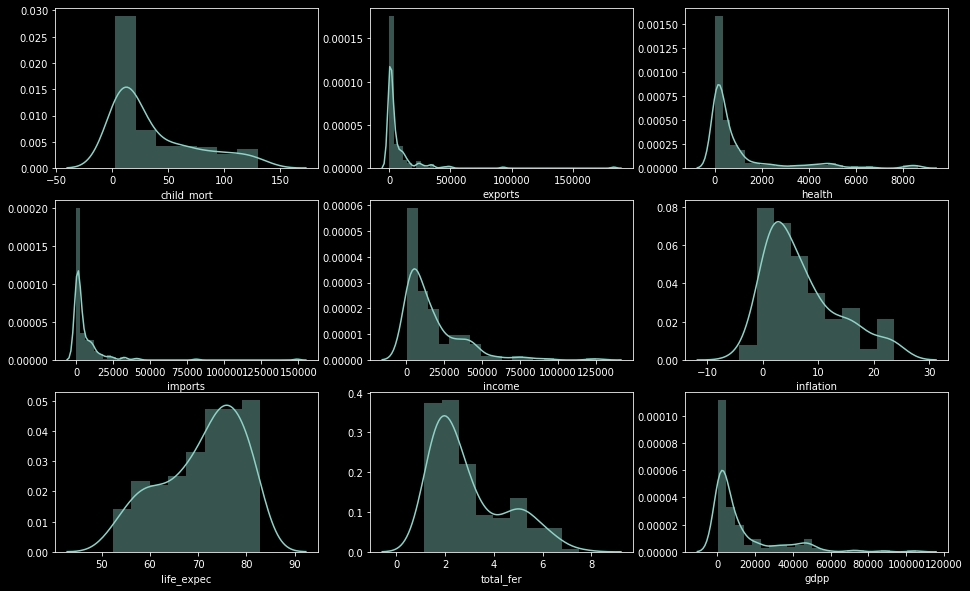

In [425]:
plt.figure(figsize = (16,10))
for x in enumerate(var):
    plt.subplot(3,3,x[0]+1)
    sns.distplot(df[x[1]])
plt.show()

##### Explanation:
From the above dist plot we can infer the fallowing:
- There is a lot of variance in the data.
- Almost all the variables have high, medium and low values in them.
- Due to the above factors clusters can be made.

- ### Subtask 2.4: Bivariate Analysis

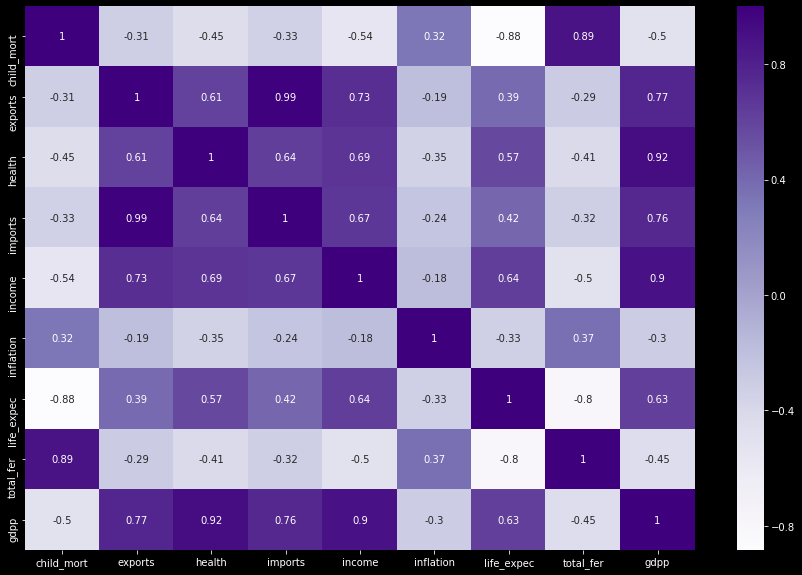

In [426]:
plt.figure(figsize = (15,10))
heat = sns.heatmap(df.corr(), annot = True, cmap = 'Purples')
down, up = heat.get_ylim()
heat.set_ylim(down+0.5, up-0.5)
plt.show()

## Task 3: Preparing the data for modeling
- ### Subtask 3.1: Scaling of variables (Normalisation)

In [427]:
data = df.drop('country', axis = 1)

In [428]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)
data.columns = var

In [429]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,0.272480,0.040379,0.120673,0.044183,0.132933,0.404479,0.604019,0.283591,0.121536
std,0.294334,0.097818,0.208237,0.098664,0.154980,0.239419,0.273538,0.238777,0.174944
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.044300,0.002428,0.007596,0.004290,0.022076,0.216267,0.425250,0.101735,0.010490
50%,0.130939,0.009667,0.035727,0.013715,0.075174,0.344877,0.681424,0.198738,0.042274
75%,0.466520,0.039603,0.111449,0.051771,0.178397,0.537434,0.802943,0.430599,0.131900
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Explanation:
Variables transformation is a very vital step before building any ML algorithm.
- it helps in faster computation.
- All the data points are in one unit whcih helps in faster convergence.
- Especially in clustering (which takes distance b/w data points as the key factor in grouping)

- ### Subtask 3.2: Hopkins Stats

In [430]:
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
        
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

In [431]:
hopkins(data)

0.8464953694643008

##### Explanation:
- Cluster Tendency: The process of evaluating the data to confirm if the data is feasible for clustering.
- Hopkins Statistics: Is's a statistic which gives a value to indicate the cluster tendency. Higher the value, higher the chances of getting good clusters.

- ### Subtask 3.3: Optimal no.of Clusters
 - #### Elbow Curve

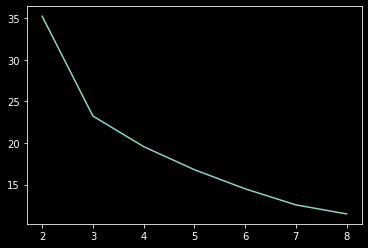

In [432]:
ssd = []
num = [x for x in range(2,9)]
for x in num:
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(data)
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
position = [0,1,2,3,4,5,6]
plt.xticks(position, num)
plt.show()

##### Explanation:
Choosing the Optimal no.of clusters to be 3
- The eblow curve is plotted based on the inertia i.e the sum of squared distance from each point to its assigned centroid. Hence the idea is to select the least number of clusters with the minimum SSD, which is the elbow point of the curve.

 - #### Silhouette Score

In [433]:
num = [x for x in range(2,8)]
for x in num:
    kmeans = KMeans(n_clusters = x)
    kmeans.fit(data)
    labels = kmeans.labels_
    silhouette = silhouette_score(data, labels)
    print('clusters = {}, silhouette = {}'.format(x, silhouette))

clusters = 2, silhouette = 0.42303512008373356
clusters = 3, silhouette = 0.40503522541398607
clusters = 4, silhouette = 0.31422442893326635
clusters = 5, silhouette = 0.3379635766720671
clusters = 6, silhouette = 0.35074867079466665
clusters = 7, silhouette = 0.3486358425187183


##### Explanation:
Choosing the optimal no.of clusters to be 3
- The Silhouette score is a measure of how similar a data point is to its own cluster compared to other clusters. So the idea is to choose the point which has the highest score. However in our case 3 clusters were decised based on the industry requirement (developed, developing and under developed countries)

## Task 4: Building the model
- ### Subtask 4.1: KMeans Clustering

In [448]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [449]:
kmeans.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 1,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 1, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 1, 2, 0, 1, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [450]:
kmeans.n_iter_

5

In [451]:
df['kmeans'] = kmeans.labels_

In [452]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,2


In [453]:
df['kmeans'].value_counts()

2    86
0    46
1    35
Name: kmeans, dtype: int64

- ### Subtask 4.1.1: Visualisation

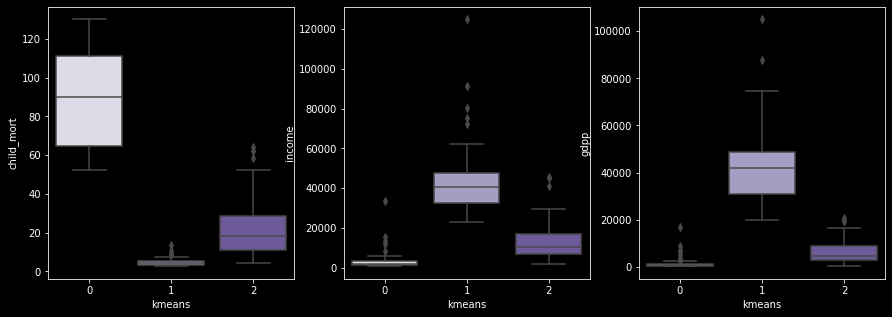

In [454]:
feature = ['child_mort', 'income', 'gdpp']
plt.figure(figsize = (15, 5))
for x in enumerate(feature):
    plt.subplot(1,3,x[0]+1)
    sns.boxplot(x = 'kmeans', y = x[1], data = df, palette = 'Purples')
plt.show()

##### Explanation:
- Cluster 0:
 - The child mortality rate is very high and the 50th percentile i.e median is 90.
 - The per capita income is very low compared to other clusters. (Lowest of all 3 clusters).
 - The GDP per capita is also very low. 
 - Can be classified as Under-developed countries.
 
- Cluster 1:
 - Has the least child mortality rate compared to the other cluster. The upper whisker is at 10.
 - Has the highest per capita income and it's lower whisker is at 22000.
 - Has the highest GDP per capita, where it's lower whisker is above the upper whisker of cluster 2.
 - Can be classified as Developed countries.
 
- Clsuter 2:
 - The child mortality rate is avg where the upper whisker ends at 60 (The point where cluster 0 stars)
 - Has the moderate per capita income. With upper whisker at the level of 75th percentile of cluster 1.
 - GDP per capita income is decent, almost above cluster 0 and below cluster 1.
 - Can be classified as Developing countries.

- ### Subtask 4.1.2: Cluster Profiling

In [455]:
df['kmeans'] = df['kmeans'].replace([0,1,2], ['Under-developed','Developed','Developing'])
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,Under-developed
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,Developing
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,Developing
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,Under-developed
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,Developing


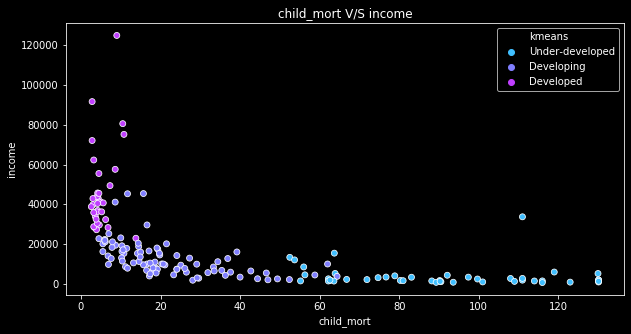

In [456]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'kmeans', data = df, palette = 'cool')
plt.title('child_mort V/S income')
plt.show()

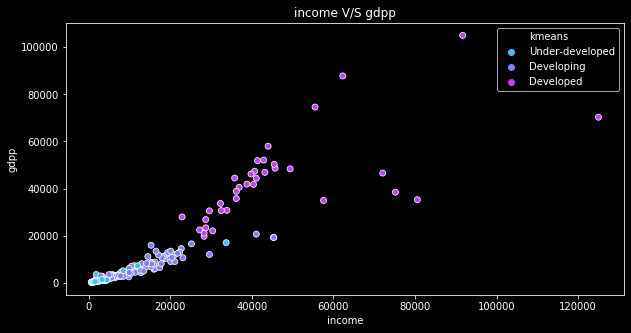

In [457]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'kmeans', data = df, palette = 'cool')
plt.title('income V/S gdpp')
plt.show()

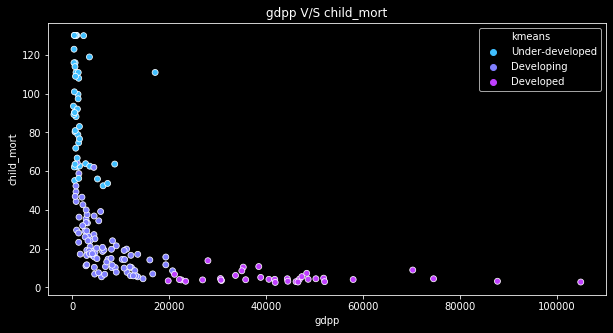

In [458]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'kmeans', data = df, palette = 'cool')
plt.title('gdpp V/S child_mort')
plt.show()

##### Explanation:
From the above scatter plots each clusters can be clearly identified, making it easy to classify them.

- ### Subtask 4.1.3: Recommendation

In [461]:
Help = df.loc[df['kmeans'] == 'Under-developed']

In [462]:
need_help = Help.sort_values(by = 'child_mort', ascending = False).sort_values(by = ['income', 'gdpp'], 
                                                                   ascending = True).head()
need_help

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans
37,"Congo, Dem. Rep.",116.00,137.27,26.42,165.66,609,20.80,57.500,6.54,334,Under-developed
88,Liberia,89.30,62.46,38.59,302.80,700,5.47,60.800,5.02,327,Under-developed
26,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.700,6.26,231,Under-developed
112,Niger,123.00,77.26,17.96,170.87,814,2.55,58.800,7.49,348,Under-developed
31,Central African Republic,130.14,52.63,17.75,118.19,888,2.01,52.352,5.21,446,Under-developed


- ### Subtask 4.2: Hierarchical Clustering
 - #### Single Linkage

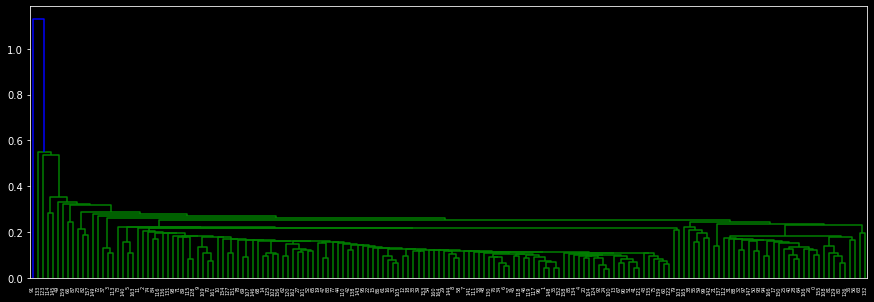

In [463]:
single = linkage(data, method = 'single')
plt.figure(figsize = (15,5))
dendrogram(single)
plt.show()

##### Explanation:
Single Linkage: The concept of linkage occurs when a cluster merges with already merged cluster (After the initial iteration). Single Linkage is the shortest distance between points in the two clusters. Hence it reduces inter cluster distance. That's why the model is closely clustered. This will not be a good model.

 - #### Complete Linkage

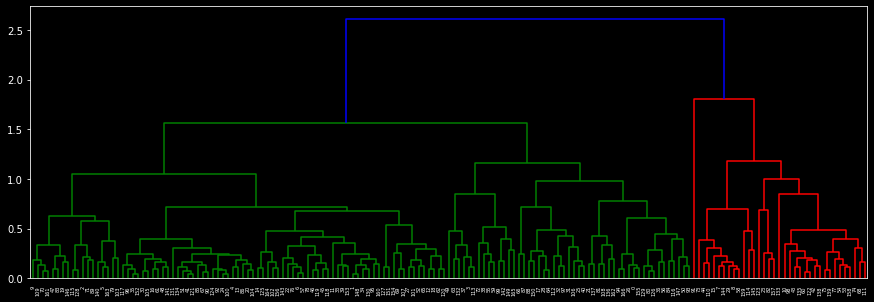

In [464]:
complete = linkage(data, method = 'complete')
plt.figure(figsize = (15,5))
dendrogram(complete)
plt.show()

##### Explanation:
Complete Linkage: Complete Linkage is the maximum distance between tow points in different clusters. This will ensure the maximum distance between inter clusters and minimum distance between intra clusters.

In [465]:
hierarchy = cut_tree(complete, n_clusters = 3).reshape(-1,)
df['hierarchy'] = hierarchy
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hierarchy
0,Afghanistan,90.2,55.30,41.92,248.30,1610,9.44,56.2,5.82,553,Under-developed,0
1,Albania,16.6,1145.20,267.90,1987.74,9930,4.49,76.3,1.65,4090,Developing,0
2,Algeria,27.3,1712.64,185.98,1400.44,12900,16.10,76.5,2.89,4460,Developing,0
3,Angola,119.0,2199.19,100.60,1514.37,5900,22.40,60.1,6.16,3530,Under-developed,0
4,Antigua and Barbuda,10.3,5551.00,735.66,7185.80,19100,1.44,76.8,2.13,12200,Developing,0


##### Explanation:
As per the dendrogram it is clear that the algorithm has detected only two clusters. However since the industry requirement is 3 we have cut the tree and selected 3 clusters.

In [466]:
df['hierarchy'].value_counts()

0    132
1     34
2      1
Name: hierarchy, dtype: int64

- ### Subtask 4.2.1: Visualisation

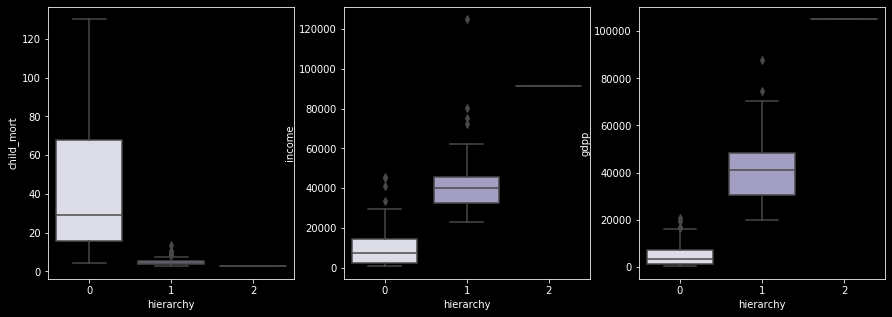

In [467]:
feature = ['child_mort', 'income', 'gdpp']
plt.figure(figsize = (15, 5))
for x in enumerate(feature):
    plt.subplot(1,3,x[0]+1)
    sns.boxplot(x = 'hierarchy', y = x[1], data = df, palette = 'Purples')
plt.show()

##### Explanation:
- Cluster 0:
 - Has captured all the countries which have moderate to high child mortality rate.
 - The per capita income is b/w low to moderate. Also the upper whisker is at the level of 25th percentile of cluster 1.
 - GDP per capita is below 20000. The upper whisker is less than the lower whisker of cluster 1.

- Cluster 1:
 - Has captured those countries which have very low child mortality rate.
 - The per capita income of the countries range b/w above average to high, and it has it's median at 40000.
 - GDP per capita is higher than cluster 0.
 
- Cluster 2:
 - It consists of only one country which has the lowest child mortality rate and highest per capita income and GDP per capita. This is due to outliers in the data set.

- ### Subtask 4.1.2: Cluster Profiling

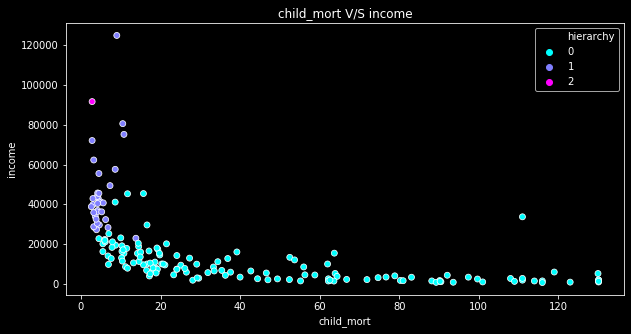

In [468]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'child_mort', y = 'income', hue = 'hierarchy', data = df, palette = 'cool')
plt.title('child_mort V/S income')
plt.show()

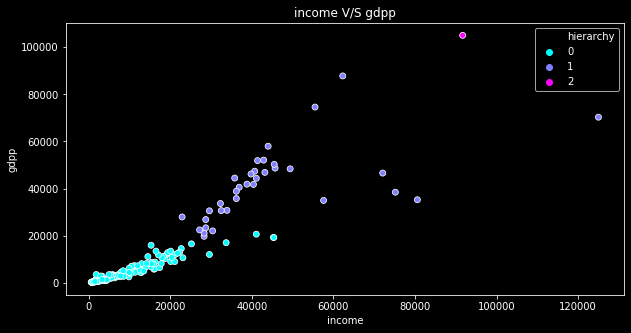

In [469]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'income', y = 'gdpp', hue = 'hierarchy', data = df, palette = 'cool')
plt.title('income V/S gdpp')
plt.show()

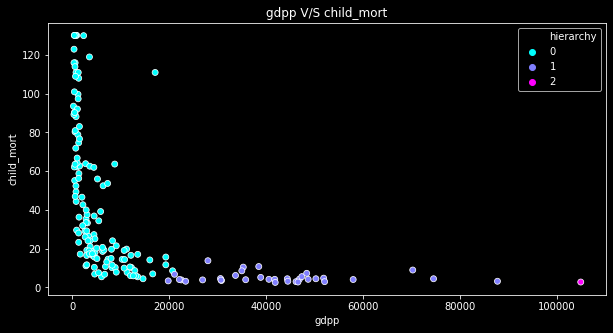

In [470]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = 'gdpp', y = 'child_mort', hue = 'hierarchy', data = df, palette = 'cool')
plt.title('gdpp V/S child_mort')
plt.show()

##### Explanation:
From the above scatter plots each clusters can be clearly identified, making it easy to classify them.

- ### Subtask 4.1.3: Recommendation

In [471]:
Help_h = df.loc[df['hierarchy'] == 0]

In [472]:
need_help_h = Help_h.sort_values(by = 'child_mort', ascending = False).sort_values(by = ['income', 'gdpp'], 
                                                                   ascending = True).head()
need_help_h

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans,hierarchy
37,"Congo, Dem. Rep.",116.00,137.27,26.42,165.66,609,20.80,57.500,6.54,334,Under-developed,0
88,Liberia,89.30,62.46,38.59,302.80,700,5.47,60.800,5.02,327,Under-developed,0
26,Burundi,93.60,20.61,26.80,90.55,764,12.30,57.700,6.26,231,Under-developed,0
112,Niger,123.00,77.26,17.96,170.87,814,2.55,58.800,7.49,348,Under-developed,0
31,Central African Republic,130.14,52.63,17.75,118.19,888,2.01,52.352,5.21,446,Under-developed,0


### Final Insight 
- The Hirerarchical clustering was only able to identify two clusters, Hence this approach is not appropriate for this business need. 
- The industry requirement was to create three clusters. (Developed, Developing and Under-developed)
- This was achieved with K Means clustering and the countries were classified correctly according to their socio-economical and health factors. 
- However both the models have produced identical results in identifying the countries which are in the direst need of aid. 
- Following is the list of countries which need help: 

In [473]:
need_help[['country','child_mort', 'income', 'gdpp']]

,country,child_mort,income,gdpp
37,"Congo, Dem. Rep.",116.00,609,334
88,Liberia,89.30,700,327
26,Burundi,93.60,764,231
112,Niger,123.00,814,348
31,Central African Republic,130.14,888,446
